In [18]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [19]:
from settings import SimulationSetup
from helper import rdd_dose_Gy, rdd_dose_Gy_basic
from printing import pretty_print

In [20]:
# create an array of values to be used for horizontal axis of RDD vs radius plot
# this is distance from ion track in meters

points_per_decade = 10
start_at_exponent = -9
stop_at_exponent = -4

no_of_decades = stop_at_exponent-start_at_exponent
no_of_samples = no_of_decades * points_per_decade + 1

r_m = np.logspace(start=start_at_exponent, stop=stop_at_exponent, num=no_of_samples)

In [21]:
simulation_setup = SimulationSetup()

# all necessary parameters
a0_nm = 10
E_MeV_u = 43.
simulation_setup.beam.particle_name = "12C"
simulation_setup.material.material_name = "Water, Liquid"
simulation_setup.tst_model.rdd_model_name = "RDD_Geiss"

# we will calculate RDD just for a single energy value
simulation_setup.beam.start_E_MeV_u = E_MeV_u
simulation_setup.beam.stop_E_MeV_u = simulation_setup.beam.start_E_MeV_u
simulation_setup.beam.num_E_MeV_u = 1

# select Scholz model for track radius
simulation_setup.tst_model.er_model_name = 'ER_Scholz'

# some of the options in simulation setup are not needed for RDD calculation,
# instead of leaving default values, we set those items to `nan` (not-a-number) or to `None`

# just a single value of a0 parameter, note that final `,` is needed in python to define a single-element tuple
simulation_setup.tst_model.a0_nm = (a0_nm,)

# model of response to reference radiation (gamma) is not needed for RDD calculations
simulation_setup.gamma_response_model = None  

# there is no need to specify slab thickness for RDD calculation
simulation_setup.beam.dose_gy = float('nan')

# there is no need to specify slab thickness and saturation cross-section for RDD calculation
simulation_setup.material.slab_thickness_um = float('nan')
simulation_setup.saturation_cross_section_factor = float('nan')

simulation_setup

SimulationSetup(beam=BeamSetup(particle_name='12C', start_E_MeV_u=43.0, stop_E_MeV_u=43.0, num_E_MeV_u=1, dose_gy=nan), material=DetectorPropertySetup(material_name='Water, Liquid', slab_thickness_um=nan), gamma_response_model=None, tst_model=TrackStructureModel(er_model_name='ER_Scholz', rdd_model_name='RDD_Geiss', a0_nm=(10,)), stopping_power_source_name='PSTAR', saturation_cross_section_factor=nan)

In [22]:
pretty_print(simulation_setup)

SimulationSetup(
    beam=BeamSetup(
        particle_name='12C',
        start_E_MeV_u=43.0,
        stop_E_MeV_u=43.0,
        num_E_MeV_u=1,
        dose_gy=nan,
    ),
    material=DetectorPropertySetup(
        material_name='Water, Liquid',
        slab_thickness_um=nan,
    ),
    gamma_response_model=None,
    tst_model=TrackStructureModel(
        er_model_name='ER_Scholz',
        rdd_model_name='RDD_Geiss',
        a0_nm=(
            10,
        ),
    ),
    stopping_power_source_name='PSTAR',
    saturation_cross_section_factor=nan,
)


In [23]:
d_Gy = rdd_dose_Gy(r_m=r_m, sim_setup=simulation_setup)

Text(0, 0.5, 'Local dose [Gy]')

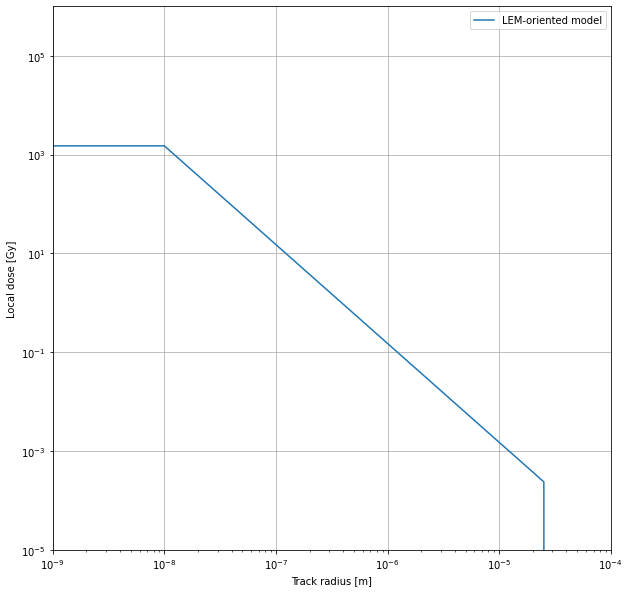

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(r_m, d_Gy, label='LEM-oriented model')
ax.grid()
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-9, 1e-4)
ax.set_ylim(1e-5, 1e6)
ax.set_xlabel("Track radius [m]")
ax.set_ylabel("Local dose [Gy]")